In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#read in csvs for 2021 to 2010

census2021 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2021.B19081-2022-12-16T032108.csv')

census2020 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2020.B19081-2022-12-16T032118.csv')
census2019 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2019.B19081-2022-12-16T032124.csv')
census2018 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2018.B19081-2022-12-16T032130.csv')
census2017 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2017.B19081-2022-12-16T032135.csv')
census2016 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2016.B19081-2022-12-16T032141.csv')
census2015 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2015.B19081-2022-12-16T032147.csv')
census2014 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2014.B19081-2022-12-16T032152.csv')
census2013 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2013.B19081-2022-12-16T032157.csv')
census2012 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2012.B19081-2022-12-16T032202.csv')
census2011 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2011.B19081-2022-12-16T032208.csv')
census2010 = pd.read_csv('Downloads/numerical analysis data/ACSDT5Y2010.B19081-2022-12-16T032211.csv')


In [3]:
datalist = [census2021, #store all dataframes in a list so we can iterate through them for graphing and calculating
census2020,
census2019,
census2018,
census2017,
census2016,
census2015,
census2014,
census2013,
census2012,
census2011,
census2010]

In [4]:
def fileclean(file): #function to prepare files for graphing and calculations
    #rename columns for ease of use
    draft = file.rename(columns = {'United States!!Estimate': 'Mean Income', 'United States!!Margin of Error': 'Margin of Error'})
    #dropped unnecessary rows
    clean = draft.drop([0])
    #reset index to help with making plots start from 0
    index = clean.reset_index(drop=True)
    #sort through the column to feed in data for graphing in the correct order
    sort = index.sort_index(ascending = True)
    #original data type of csv was string; converted each value to a numerical state 
    sort['Mean Income'] = [float(str(i).replace(",", "")) for i in sort["Mean Income"]]
    #named the fully ready file
    file = sort
    return file

In [5]:
datalist = [df.pipe(fileclean) for df in datalist] #pipe function allows me to apply my function for all the dataframes in the list
datalist

[       Label (Grouping)  Mean Income Margin of Error
 0       Lowest Quintile      15091.0             ±40
 1       Second Quintile      41089.0             ±93
 2        Third Quintile      69508.0            ±144
 3       Fourth Quintile     109673.0            ±199
 4      Highest Quintile     250618.0            ±511
 5         Top 5 Percent     453167.0          ±1,334,
        Label (Grouping)  Mean Income Margin of Error
 0       Lowest Quintile      14364.0             ±37
 1       Second Quintile      38637.0             ±83
 2        Third Quintile      65388.0            ±128
 3       Fourth Quintile     103277.0            ±175
 4      Highest Quintile     236069.0            ±437
 5         Top 5 Percent     427583.0          ±1,127,
        Label (Grouping)  Mean Income Margin of Error
 0       Lowest Quintile      13870.0             ±39
 1       Second Quintile      37214.0             ±93
 2        Third Quintile      63218.0            ±148
 3       Fourth Quintile  

In [6]:
census2021 = fileclean(census2021)
census2021.dtypes

Label (Grouping)     object
Mean Income         float64
Margin of Error      object
dtype: object

In [12]:
def plotter(data): #function to plot all graphs in the list of dataframes
    for i in data:
        
        fig, ax = plt.subplots() 
        sns.pointplot(data = i, x = i.index, y = 'Mean Income') #Lorenz curve
        ax.plot([0, 1], [0, 1], transform=ax.transAxes) #line of equality
        plt.xlabel('Quintile of the US Population (equal sized groups of 20% of the population)') #names x axis
        plt.ylabel('Mean Income (USD adjusted for 2021 inflation)') #names y axis





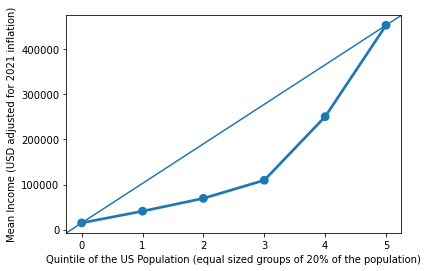

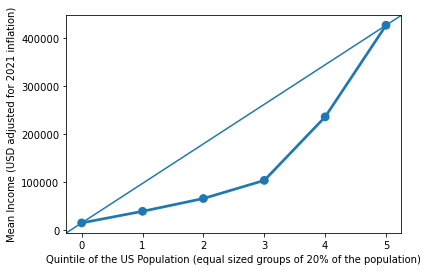

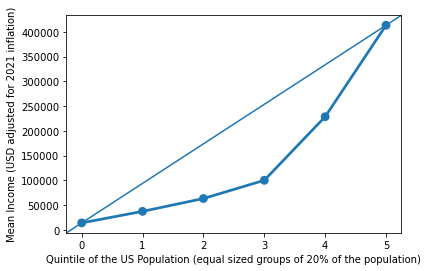

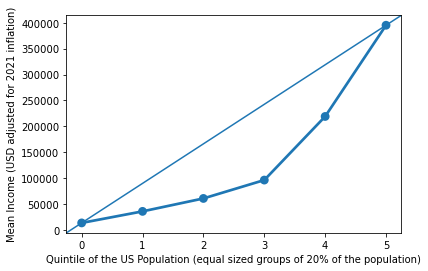

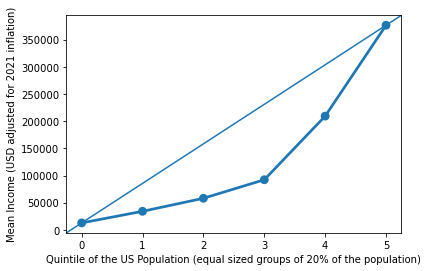

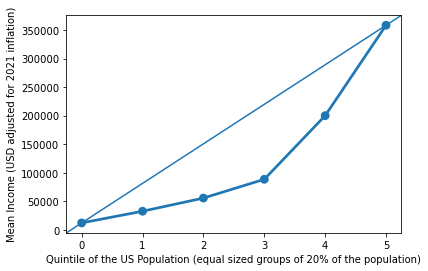

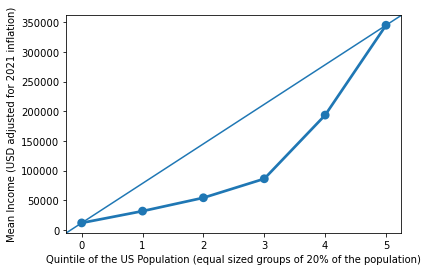

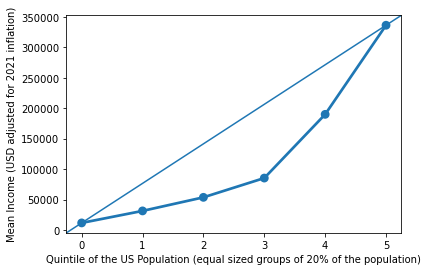

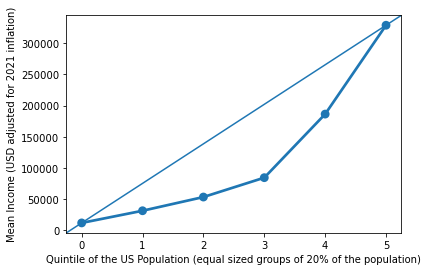

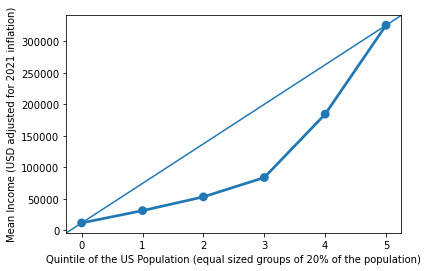

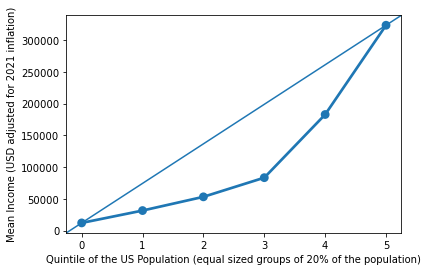

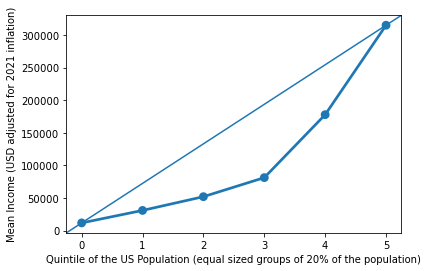

In [13]:
plotter(datalist)

In [14]:
def ginic(data):
    # based on equations from http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    
    data = np.sort(data) #sort the list in proper order
    
    index = np.arange(1,data.shape[0]+1) #find the index of each element in list
    
    n = data.shape[0] #find number of elements in the list with "shape" function
    
    #print(type(data))
    #print(type(index))
    #print(type(n))
    
    return ((np.sum((2*index-n-1)*data))/(n*np.sum(data))) #returns Gini coefficient 

In [15]:
def ginicoefficient(data):
    
    data = np.sort(data) #sort the list in proper order
    
    index = np.arange(1,data.shape[0]+1) #find the index of each element in list
    
    num = data.shape[0] #find number of elements in the list with "shape" function

    result = ((np.sum((2*index-num-1)*data))/(num*np.sum(data))) #returns Gini coefficient 
    
    return result


In [16]:
for i in datalist:
    print(ginicoefficient(i['Mean Income']))

0.5073992755120077
0.5075916224452682
0.5077955348141542
0.5073795428634138
0.506387407050754
0.5049591404810406
0.5030348453580661
0.5001461784213389
0.49802266987444194
0.4964992493220734
0.49570027553990664
0.49430862856918095
